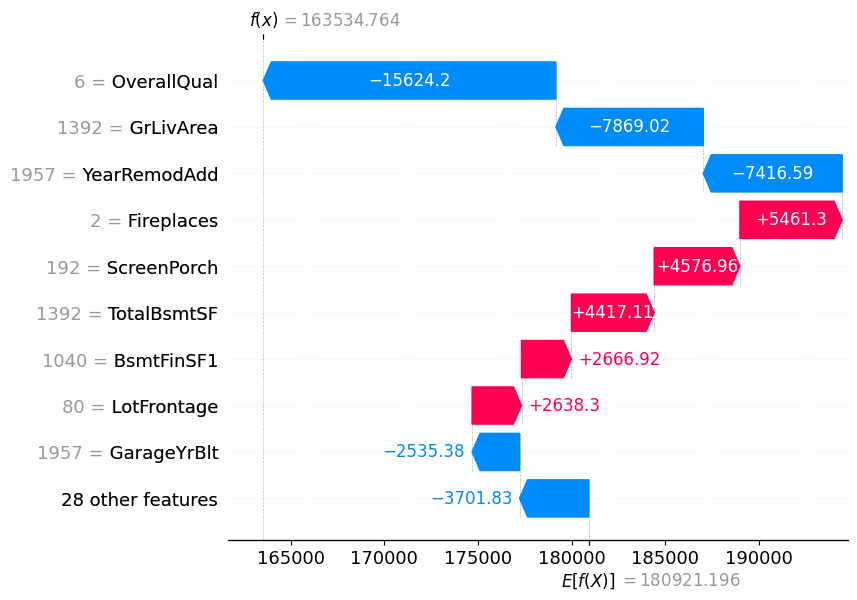

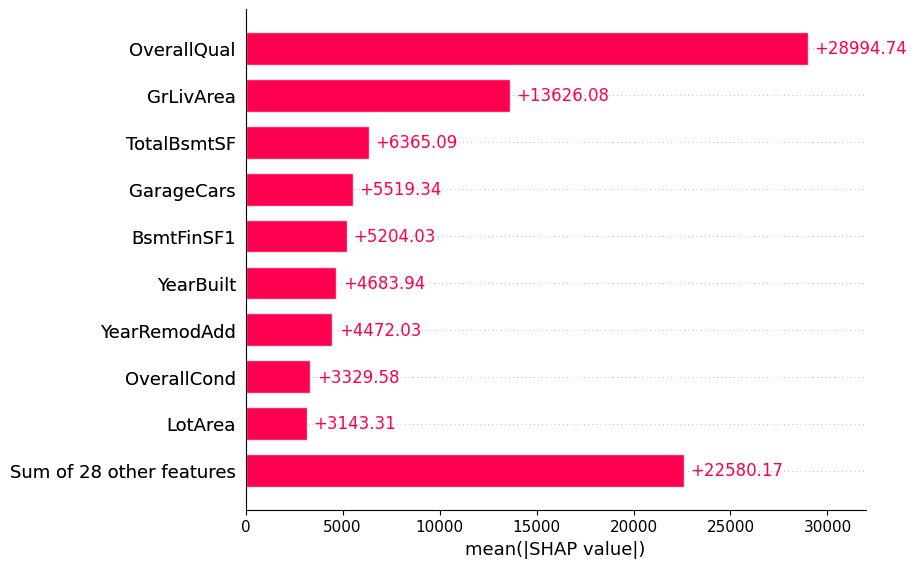

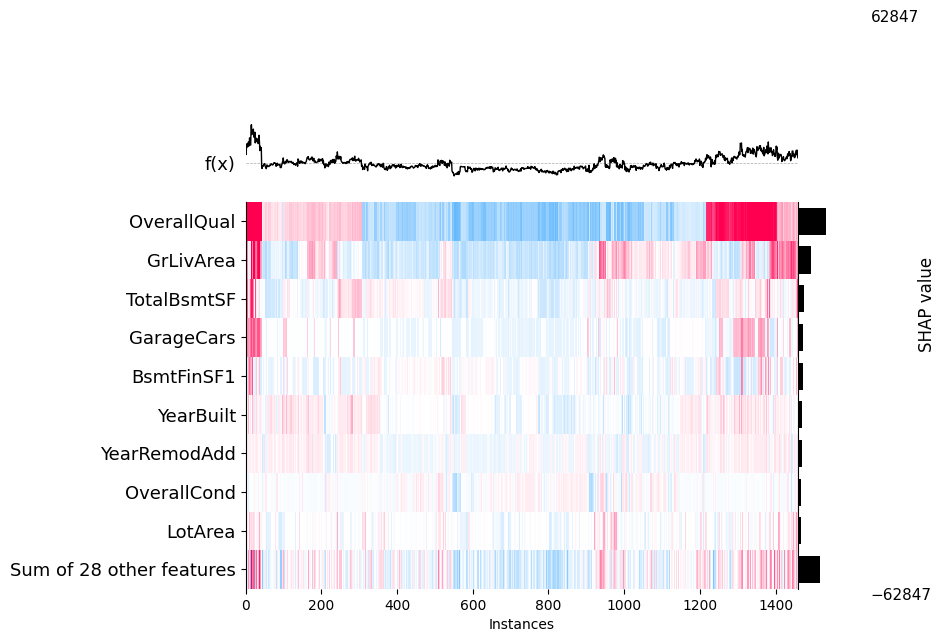

In [8]:
#from google.colab import drive
import pandas as pd
import numpy as np
import lightgbm as lgbm
import shap

#Reading the csv data into a variable. CSV was stored on Google Drive.
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/train.csv")\

#Removing the non-number columns from df. Storing all but last columns in x, last column in y
df_int = df._get_numeric_data()
x=df_int.drop("SalePrice",axis=1)
y=df_int.SalePrice

#LGBM regression on the data
model = lgbm.LGBMRegressor()
model.fit(x,y)
y_prediction = model.predict(x)

#Shap values after regression
explainer = shap.TreeExplainer(model)
shap_values = explainer(x)

#Plotting the data
i_median = np.argsort(y_prediction)[len(y_prediction)//2]
shap.plots.waterfall(shap_values[i_median])
print()
shap.plots.bar(shap_values)
print()
shap.plots.heatmap(shap_values)